# Rich Output

In Python, objects can declare their textual representation using the `__repr__` method. IPython expands on this idea and allows objects to declare other, rich representations including:

- HTML
- JSON
- PNG
- JPEG
- SVG
- LaTeX

A single object can declare some or all of these representations; all are handled by IPython's display system. This Notebook shows how you can use this *display system* to incorporate a broad range of content into your Notebooks.

# Basic display imports
The `display` function is a general purpose tool for displaying different representations of objects. Think of it as `print` for these rich representations.

`from IPython.display import display`    

A few points:

- Calling `display` on an object will send **all** possible representations to the Notebook.
- These representations are stored in the Notebook document.
- In general the Notebook will use the richest available representation.  
If you want to display a particular representation, there are specific functions for that:

`from IPython.display import (
    display_pretty, display_html, display_jpeg,
    display_png, display_json, display_latex, display_svg
)`  

# Images

To work with images (JPEG, PNG) use the Image class.

`from IPython.display import Image`

`i = Image(filename='../images/ipython_logo.png')`

Returning an `Image` object from an expression will automatically display it:

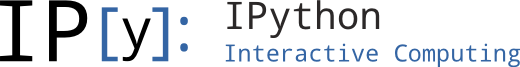

In [1]:
from IPython.display import Image
i = Image (filename='pythonImage.png')

i

An image can also be displayed from raw data or a URL

In [2]:
Image(url='http://python.org/images/python-logo.gif')

SVG images are also supported out of the box.

In [3]:
from IPython.display import SVG
SVG(filename='Python_logo_and_wordmark.svg')

## Embedded vs non-embedded Images

By default, image data is embedded in the notebook document so that the images can be viewed offline. However it is also possible to tell the `Image` class to only store a link to the image. Let's see how this works using a webcam at Berkeley.



In [4]:
from IPython.display import Image
img_url = 'http://www.lawrencehallofscience.org/static/scienceview/scienceview.berkeley.edu/html/view/view_assets/images/newview.jpg'

# by default Image data are embedded
Embed      = Image(img_url)

# if kwarg `url` is given, the embedding is assumed to be false
SoftLinked = Image(url=img_url)

# In each case, embed can be specified explicitly with the `embed` kwarg
# ForceEmbed = Image(url=img_url, embed=True)

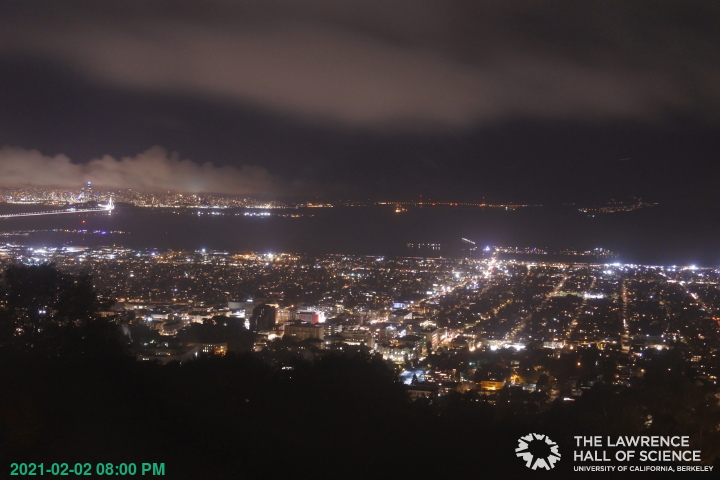

In [5]:
Embed

In [6]:
SoftLinked

In [7]:
from IPython.display import HTML

In [8]:
s = """<table>
<tr>
<th>Header 1</th>
<th>Header 2</th>
</tr>
<tr>
<td>row 1, cell 1</td>
<td>row 1, cell 2</td>
</tr>
<tr>
<td>row 2, cell 1</td>
<td>row 2, cell 2</td>
</tr>
</table>"""

In [9]:
h = HTML(s)

In [10]:
display(h)

Header 1,Header 2
"row 1, cell 1","row 1, cell 2"
"row 2, cell 1","row 2, cell 2"


In [11]:
%%html
<table>
<tr>
<th>Header 1</th>
<th>Header 2</th>
</tr>
<tr>
<td>row 1, cell 1</td>
<td>row 1, cell 2</td>
</tr>
<tr>
<td>row 2, cell 1</td>
<td>row 2, cell 2</td>
</tr>
</table>

Header 1,Header 2
"row 1, cell 1","row 1, cell 2"
"row 2, cell 1","row 2, cell 2"


In [12]:
from IPython.display import Javascript

In [13]:
js = Javascript('alert("hi")');

In [14]:
display(js)

<IPython.core.display.Javascript object>

In [15]:
Javascript(
    """$.getScript('//cdnjs.cloudflare.com/ajax/libs/d3/3.2.2/d3.v3.min.js')"""
)

<IPython.core.display.Javascript object>

In [16]:
%%html
<style type="text/css">

circle {
  fill: rgb(31, 119, 180);
  fill-opacity: .25;
  stroke: rgb(31, 119, 180);
  stroke-width: 1px;
}

.leaf circle {
  fill: #ff7f0e;
  fill-opacity: 1;
}

text {
  font: 10px sans-serif;
}

</style>

In [17]:
%%javascript

// element is the jQuery element we will append to
var e = element.get(0);
    
var diameter = 600,
    format = d3.format(",d");

var pack = d3.layout.pack()
    .size([diameter - 4, diameter - 4])
    .value(function(d) { return d.size; });

var svg = d3.select(e).append("svg")
    .attr("width", diameter)
    .attr("height", diameter)
  .append("g")
    .attr("transform", "translate(2,2)");

d3.json("data/flare.json", function(error, root) {
  var node = svg.datum(root).selectAll(".node")
      .data(pack.nodes)
    .enter().append("g")
      .attr("class", function(d) { return d.children ? "node" : "leaf node"; })
      .attr("transform", function(d) { return "translate(" + d.x + "," + d.y + ")"; });

  node.append("title")
      .text(function(d) { return d.name + (d.children ? "" : ": " + format(d.size)); });

  node.append("circle")
      .attr("r", function(d) { return d.r; });

  node.filter(function(d) { return !d.children; }).append("text")
      .attr("dy", ".3em")
      .style("text-anchor", "middle")
      .text(function(d) { return d.name.substring(0, d.r / 3); });
});

d3.select(self.frameElement).style("height", diameter + "px");

<IPython.core.display.Javascript object>

In [18]:
from IPython.display import Audio
Audio(url="https://static1.squarespace.com/static/562921c2e4b0889aaedb4e2e/t/5f79cc2424f75f5a9dabc5da/1601818490759/26+Satisfied.mp3/original/26+Satisfied.mp3")

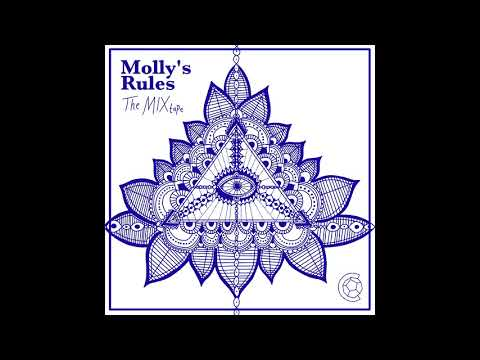

In [19]:
from IPython.display import YouTubeVideo
YouTubeVideo('HNhH1o3S-K4')

In [22]:
from IPython.display import IFrame
IFrame('https://www.willcrosswait.com/cantata/2018/2/23/vox-machina-an-exandrian-musical', width='100%', height=800)